In [2]:
import numpy as np
import pandas as pd

In [3]:
def display_eval(df):
    rewards_eval = df['rewards_eval'].values
    scRMSD_eval = df['gen_true_bb_rmsd'].values

    pred_ddg_med = np.median(rewards_eval)
    pos_ddg_prop = np.mean(rewards_eval > 0)
    scRMSD_med = np.median(scRMSD_eval)
    low_rmsd_prop = np.mean(scRMSD_eval < 2)
    success_rate = np.mean((rewards_eval > 0) & (scRMSD_eval < 2))

    print(f"Pred-ddG (median)↑: {pred_ddg_med:.3f}")
    print(f"%(ddG > 0) (%)↑: {pos_ddg_prop * 100:.1f}")
    print(f"scRMSD (median)↓: {scRMSD_med:.3f}")
    print(f"%(scRMSD < 2)(%)↑: {low_rmsd_prop * 100:.1f}")
    print(f"Success Rate (%)↑: {success_rate * 100:.1f}")

pretrained_file = 'data/original_old_10_0.5_0_results_merge.csv' 
drakes_file = 'data/original_new_10_0.5_0_results_merge.csv' 
df_pre = pd.read_csv(pretrained_file)
df_drakes = pd.read_csv(drakes_file)

print("---Pretrained---")
display_eval(df_pre)
print()
print("-----DRAKES-----")
display_eval(df_drakes)

---Pretrained---
Pred-ddG (median)↑: -0.507
%(ddG > 0) (%)↑: 36.7
scRMSD (median)↓: 0.834
%(scRMSD < 2)(%)↑: 90.0
Success Rate (%)↑: 34.4

-----DRAKES-----
Pred-ddG (median)↑: 1.084
%(ddG > 0) (%)↑: 86.6
scRMSD (median)↓: 0.913
%(scRMSD < 2)(%)↑: 92.4
Success Rate (%)↑: 79.4


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
def analyze_protein_gen_helper(protein_name, dfs, dfs_labels, clrs):
    energy_points = None
    group_labels = []
    for df, label in zip(dfs, dfs_labels):
      pred_ddg = df[df['protein_name'] == protein_name + '.pdb']['rewards_eval'].values
      group_labels.extend([label] * pred_ddg.shape[0])
      energy_points = pred_ddg if (energy_points is None) else np.concatenate((energy_points, pred_ddg))

    data = pd.DataFrame({
    'Energy': np.array(energy_points),
    'Group': group_labels
    })

    plt.figure(figsize=(8, 6))
    for label, clr in zip(dfs_labels, clrs):
      sns.kdeplot(data=data[data['Group'] == label], x='Energy', color=clr, label=label, fill=True, alpha=0.4)

    plt.axvline(x=0, color='#E06455', linestyle='--', label='Wild-type')

    plt.title(protein_name, fontsize=18)
    plt.xlabel('Predicted ΔΔG', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='', loc='upper right', fontsize=10)
    
    plt.show()

def analyze_protein_gen(protein_name):
   analyze_protein_gen_helper(protein_name, [df_pre, df_drakes], ['Pretrained', 'DRAKES'], ['#E6D983', '#0C8CE1'])

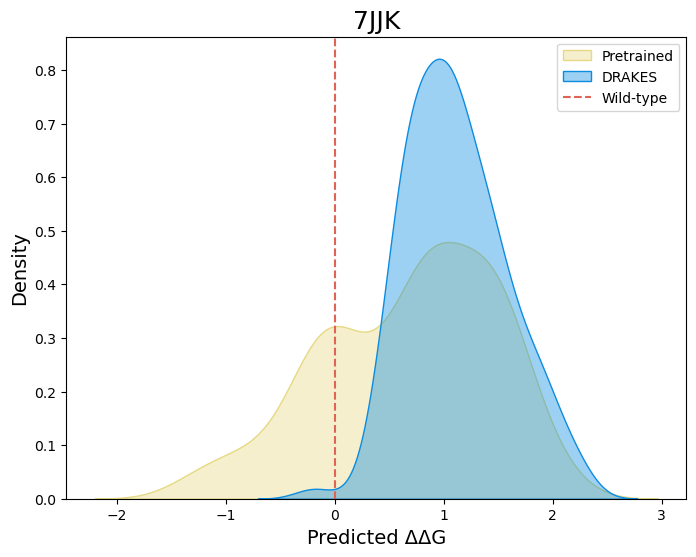

In [6]:
analyze_protein_gen('7JJK')

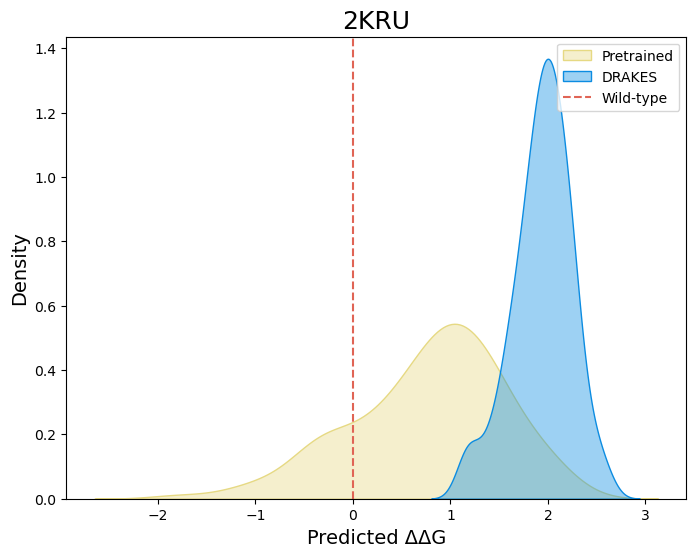

In [7]:
analyze_protein_gen('2KRU')

In [8]:
diff_file = 'data/diffusion_analysis_new_7JJK.csv' 
df_diff = pd.read_csv(diff_file)
diff_iteration = df_diff['Iteration']
mask_proportion = df_diff['Mask Proportion']
reward_average = df_diff['Reward Average']

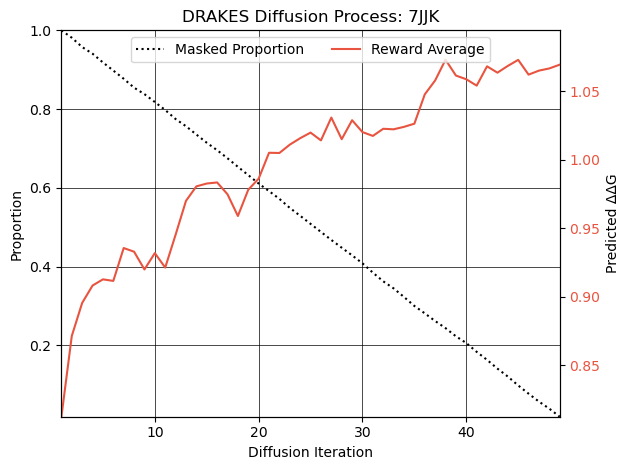

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

fig, ax1 = plt.subplots()

ax1.grid(color='black', linewidth=0.5)
ax1.plot(diff_iteration, mask_proportion, linestyle='dotted', color='black', label='Masked Proportion')
ax1.set_xlabel('Diffusion Iteration')
ax1.set_ylabel('Proportion')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim(min(diff_iteration), max(diff_iteration))  # Align grid with x-axis data range
ax1.set_ylim(min(mask_proportion), max(mask_proportion))

ax2 = ax1.twinx()
ax2.plot(diff_iteration, reward_average, color='#E8543F', label='Reward Average')
ax2.set_ylabel('Predicted ΔΔG')
ax2.tick_params(axis='y', labelcolor='#E8543F')
ax2.set_ylim(min(reward_average), max(reward_average) * 1.02)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, frameon=True)

plt.title('DRAKES Diffusion Process: 7JJK')
plt.tight_layout()
plt.show()